In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [52]:
dt = pd.read_csv('C:/Users/Pankaj/Desktop/Data_mining_Lab_code/train.csv')
dt.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [53]:
dt.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [54]:
dt.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [56]:
dt1 = dt.drop(['Cabin','Embarked','PassengerId','Ticket','Name'],axis=1)
dt1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [57]:
dt1.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [58]:
dt1['Age'].mean()

29.69911764705882

In [59]:
dt1['Age'] = dt1['Age'].fillna(dt1['Age'].mean())
# dt1.isnull().sum()

In [60]:
dt1.isnull().sum()

Survived    0
Pclass      0
Sex         0
Age         0
SibSp       0
Parch       0
Fare        0
dtype: int64

In [61]:
dt1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [62]:
# Encoding
dt1 =pd.get_dummies(dt1,columns=['Sex'],dtype=int)

In [63]:
dt1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_female,Sex_male
0,0,3,22.0,1,0,7.2500,0,1
1,1,1,38.0,1,0,71.2833,1,0
2,1,3,26.0,0,0,7.9250,1,0
3,1,1,35.0,1,0,53.1000,1,0
4,0,3,35.0,0,0,8.0500,0,1


In [64]:
dt1=dt1.drop(['Sex_female'],axis=1)
dt1.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


In [65]:
dt_m = dt1.corr()

In [66]:
dt_m

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_male
Survived,1.000000,-0.338481,-0.069809,-0.035322,0.081629,0.257307,-0.543351
Pclass,-0.338481,1.000000,-0.331339,0.083081,0.018443,-0.549500,0.131900
Age,-0.069809,-0.331339,1.000000,-0.232625,-0.179191,0.091566,0.084153
SibSp,-0.035322,0.083081,-0.232625,1.000000,0.414838,0.159651,-0.114631
Parch,0.081629,0.018443,-0.179191,0.414838,1.000000,0.216225,-0.245489
Fare,0.257307,-0.549500,0.091566,0.159651,0.216225,1.000000,-0.182333
Sex_male,-0.543351,0.131900,0.084153,-0.114631,-0.245489,-0.182333,1.000000


In [68]:
fs = dt_m.index

<Axes: >

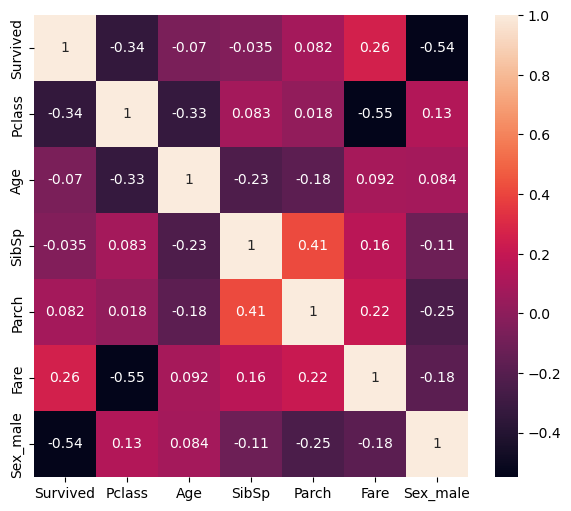

In [70]:
plt.figure(figsize=(7,6))
sns.heatmap(dt1[fs].corr(),annot=True)

## Label Encoding

In [71]:
from sklearn.preprocessing import LabelEncoder
le = LabelEncoder()

In [73]:
dt2 = dt.drop(['Cabin','Embarked','PassengerId','Ticket','Name'],axis=1)
dt2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [74]:
# male = 1
# Female =0
dt2['Sex_en'] = le.fit_transform(dt2['Sex'])
dt2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_en
0,0,3,male,22.0,1,0,7.2500,1
1,1,1,female,38.0,1,0,71.2833,0
2,1,3,female,26.0,0,0,7.9250,0
3,1,1,female,35.0,1,0,53.1000,0
4,0,3,male,35.0,0,0,8.0500,1


In [75]:
dt2 = dt2.drop(['Sex'],axis=1)
dt2.head()

,Survived,Pclass,Age,SibSp,Parch,Fare,Sex_en
0,0,3,22.0,1,0,7.2500,1
1,1,1,38.0,1,0,71.2833,0
2,1,3,26.0,0,0,7.9250,0
3,1,1,35.0,1,0,53.1000,0
4,0,3,35.0,0,0,8.0500,1


## Ordinal Encoding

In [76]:
from sklearn.preprocessing import OrdinalEncoder
oe = OrdinalEncoder()

In [77]:
dt3 = dt.drop(['Cabin','Embarked','PassengerId','Ticket','Name'],axis=1)
dt3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [79]:
dt3['Sex_oe'] =oe.fit_transform(dt[['Sex']])
dt3.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Sex_oe
0,0,3,male,22.0,1,0,7.2500,1.0
1,1,1,female,38.0,1,0,71.2833,0.0
2,1,3,female,26.0,0,0,7.9250,0.0
3,1,1,female,35.0,1,0,53.1000,0.0
4,0,3,male,35.0,0,0,8.0500,1.0


In [80]:
dt.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [82]:
dt['Fare'].mode()

0    8.05
Name: Fare, dtype: float64

## One hot encoding

# Missing Value Handing Technique

## using fillna approach which is basic approach using (Mean,Median)

In [84]:
# This approach already use before 

## Using Imputation approach

In [103]:
import pkgutil 
for m in pkgutil.iter_modules(sk.__path__):
    print(m.name)

__check_build
_build_utils
_built_with_meson
_config
_distributor_init
_isotonic
_loss
_min_dependencies
base
calibration
cluster
compose
conftest
covariance
cross_decomposition
datasets
decomposition
discriminant_analysis
dummy
ensemble
exceptions
experimental
externals
feature_extraction
feature_selection
gaussian_process
impute
inspection
isotonic
kernel_approximation
kernel_ridge
linear_model
manifold
metrics
mixture
model_selection
multiclass
multioutput
naive_bayes
neighbors
neural_network
pipeline
preprocessing
random_projection
semi_supervised
svm
tests
tree
utils


In [104]:
from sklearn import impute as i
dir(i)

['KNNImputer',
 'MissingIndicator',
 'SimpleImputer',
 '__all__',
 '__builtins__',
 '__cached__',
 '__doc__',
 '__file__',
 '__getattr__',
 '__loader__',
 '__name__',
 '__package__',
 '__path__',
 '__spec__',
 '_base',
 '_knn',
 'typing']

In [105]:
from sklearn.impute import SimpleImputer as s
dir(s)

['__annotations__',
 '__class__',
 '__delattr__',
 '__dict__',
 '__dir__',
 '__doc__',
 '__eq__',
 '__format__',
 '__ge__',
 '__getattribute__',
 '__getstate__',
 '__gt__',
 '__hash__',
 '__init__',
 '__init_subclass__',
 '__le__',
 '__lt__',
 '__module__',
 '__ne__',
 '__new__',
 '__reduce__',
 '__reduce_ex__',
 '__repr__',
 '__setattr__',
 '__setstate__',
 '__sizeof__',
 '__sklearn_clone__',
 '__str__',
 '__subclasshook__',
 '__weakref__',
 '_build_request_for_signature',
 '_check_feature_names',
 '_check_n_features',
 '_concatenate_indicator',
 '_concatenate_indicator_feature_names_out',
 '_dense_fit',
 '_doc_link_module',
 '_doc_link_template',
 '_doc_link_url_param_generator',
 '_fit_indicator',
 '_get_default_requests',
 '_get_doc_link',
 '_get_metadata_request',
 '_get_param_names',
 '_get_tags',
 '_more_tags',
 '_parameter_constraints',
 '_repr_html_',
 '_repr_html_inner',
 '_repr_mimebundle_',
 '_sklearn_auto_wrap_output_keys',
 '_sparse_fit',
 '_transform_indicator',
 '_valid

# help(s)

In [114]:
dt4 = dt.drop(['Cabin','Embarked','PassengerId','Ticket','Name'],axis=1)
dt4.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500


In [115]:
dt4.head(20)

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare
0,0,3,male,22.0,1,0,7.2500
1,1,1,female,38.0,1,0,71.2833
2,1,3,female,26.0,0,0,7.9250
3,1,1,female,35.0,1,0,53.1000
4,0,3,male,35.0,0,0,8.0500
5,0,3,male,NaN,0,0,8.4583
6,0,1,male,54.0,0,0,51.8625
7,0,3,male,2.0,3,1,21.0750
8,1,3,female,27.0,0,2,11.1333
9,1,2,female,14.0,1,0,30.0708


In [110]:
dt4.isnull().sum()

Survived      0
Pclass        0
Sex           0
Age         177
SibSp         0
Parch         0
Fare          0
dtype: int64

In [116]:
from sklearn.impute import SimpleImputer
i_mean = SimpleImputer(missing_values=np.nan,strategy='mean')
# i_median = SimpleImputer(missing_values=np.nan,strategy='median')


In [125]:
# dt4_1 = dt4
# dt4_2 = dt4
# dt4_1['i_mean'] = i_mean.fit(dt4_1[['Age']])
# dt4_1['i_mean'] = i_mean.transform(dt4_1[['Age']])
# dt4_2['i_median'] = i_median.fit(dt4_2[['Age']])
# dt4_2['i_median'] = i_median.transform(dt4_2[['Age']])

In [126]:
dt4_1.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,i_mean,i_median
0,0,3,male,22.0,1,0,7.2500,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,35.0,35.0


In [127]:
dt4_2.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,i_mean,i_median
0,0,3,male,22.0,1,0,7.2500,22.0,22.0
1,1,1,female,38.0,1,0,71.2833,38.0,38.0
2,1,3,female,26.0,0,0,7.9250,26.0,26.0
3,1,1,female,35.0,1,0,53.1000,35.0,35.0
4,0,3,male,35.0,0,0,8.0500,35.0,35.0
